In [1]:
##########################################################################
# Created on Sat Nov 07 22:22:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

# 8.6.1.Sharpe ratio

$$SR=\frac{E(R_P)-R_F}{\sigma_P}\tag{8-59}$$

In [2]:
def SR(Rp,Rf,Vp):
    '''Define a function to calculate Sharpe Ratio
    Rp:annualized return of the portfolio
    Rf:risk free rate
    Vp:annualized volatility of the portfolio'''
    sharpe_ratio=(Rp-Rf)/Vp
    return sharpe_ratio

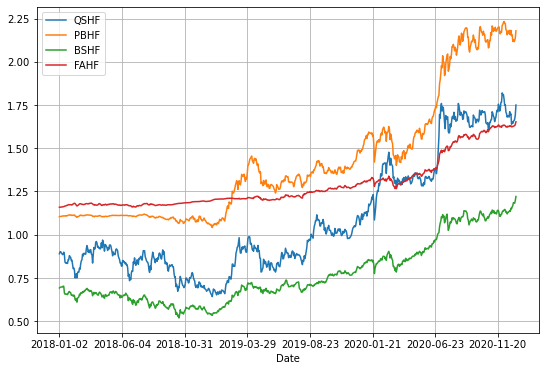

In [3]:
import pandas as pd

fund=pd.read_excel('NPV of 4 mutual funds(2018-2020).xlsx',engine='openpyxl',sheet_name="Sheet1",header=0,index_col=0)
fund.plot(figsize=(9,6),grid=True)

In [4]:
import numpy as np

R_fund=np.log(fund/fund.shift(1))
R_fund=R_fund.dropna()

R_mean=R_fund.mean()*252
Sigma=R_fund.std()*np.sqrt(252)

R_f=0.015

SR_3years=SR(Rp=R_mean,Rf=R_f,Vp=Sigma)
print('3 years average Sharpe ratio is\n',round(SR_3years,4))

3 years average Sharpe ratio is
 QSHF    0.6399
PBHF    1.2620
BSHF    0.8433
FAHF    1.9951
dtype: float64


In [5]:
R_fund2018=R_fund.loc['2018-01-01':'2018-12-31']
R_fund2019=R_fund.loc['2019-01-01':'2019-12-31']
R_fund2020=R_fund.loc['2020-01-01':'2020-12-31']

R_mean_2018=R_fund2018.mean()*252
R_mean_2019=R_fund2019.mean()*252
R_mean_2020=R_fund2020.mean()*252

Sigma_2018=R_fund2018.std()*np.sqrt(252)
Sigma_2019=R_fund2019.std()*np.sqrt(252)
Sigma_2020=R_fund2020.std()*np.sqrt(252)

SR_2018=SR(Rp=R_mean_2018,Rf=R_f,Vp=Sigma_2018)
SR_2019=SR(Rp=R_mean_2019,Rf=R_f,Vp=Sigma_2019)
SR_2020=SR(Rp=R_mean_2020,Rf=R_f,Vp=Sigma_2020)

print('Sharpe ratio of 2018 is\n',round(SR_2018,4))
print('Sharpe ratio of 2019 is\n',round(SR_2019,4))
print('Sharpe ratio of 2020 is\n',round(SR_2020,4))

Sharpe ratio of 2018 is
 QSHF   -0.8801
PBHF   -0.9357
BSHF   -1.0842
FAHF    0.7611
dtype: float64
Sharpe ratio of 2019 is
 QSHF    1.5363
PBHF    1.9726
BSHF    2.3041
FAHF    2.0285
dtype: float64
Sharpe ratio of 2020 is
 QSHF    1.5170
PBHF    1.5383
BSHF    1.8470
FAHF    2.7960
dtype: float64


# 8.6.2.Sortino ratio

$$SOR=\frac{E(R_P)-R_F}{\sigma_D}\tag{8-60}$$\
where,\
$\sigma_D$:downside deviation of portfolio and calculated as below\
$\sigma_D=\sqrt{\frac{1}{N_D}\sum_{i=1}^N[min(R_{Pi},0)]^2}\tag{8-61}$\
$N_D$:number of sample (return<0)

In [6]:
def SOR(Rp,Rf,Vd):
    '''Define a function to calculate Sortino Ratio
    Rp:annualized return of portfolio
    Rf:risk free rate
    Vd:annualized downside deviation'''
    sortino_ratio=(Rp-Rf)/Vd
    return sortino_ratio

In [7]:
V_down=np.zeros_like(R_mean)
for i in range(len(V_down)):
    R_neg=R_fund.iloc[:,i][R_fund.iloc[:,i]<0]
    N_down=len(R_neg)
    V_down[i]=np.sqrt(252)*np.sqrt(np.sum(R_neg**2)/N_down)
    print(R_fund.columns[i],'annualized downside deviation',round(V_down[i],4))

QSHF annualized downside deviation 0.3243
PBHF annualized downside deviation 0.1797
BSHF annualized downside deviation 0.2212
FAHF annualized downside deviation 0.0537


In [8]:
SOR_3years=SOR(Rp=R_mean,Rf=R_f,Vd=V_down)
print('3 years average Sortino ratio\n',round(SOR_3years,4))

3 years average Sortino ratio
 QSHF    0.6746
PBHF    1.2246
BSHF    0.8199
FAHF    2.0059
dtype: float64


# 8.6.3.Treynor ratio

$$TR=\frac{E(R_P)-R_F}{\beta_P}\tag{8-62}$$\
where,\
$\beta_P$:beta of portfolio

In [9]:
def TR(Rp,Rf,beta):
    '''Define a function to calculate Treynor ration
    Rp:annualized return of portfolio
    Rf:risk free rate
    beta:beta of portfolio'''
    treynor_ratio=(Rp-Rf)/beta
    return treynor_ratio

In [10]:
import statsmodels.api as sm

HS300=pd.read_excel('Close price of HS300(2018-2020).xlsx',engine='openpyxl',sheet_name="Sheet1",header=0,index_col=0)
R_HS300=np.log(HS300/HS300.shift(1))
R_HS300=R_HS300.dropna()

X_addcons=sm.add_constant(R_HS300)

betas=np.zeros_like(R_mean)
cons=np.zeros_like(R_mean)

for i in range(len(R_mean)):
    Y=R_fund.iloc[:,i]
    model=sm.OLS(endog=Y,exog=X_addcons)
    result=model.fit()
    cons[i]=result.params[0]
    betas[i]=result.params[1]
    print(R_fund.columns[i],'Beta',round(betas[i],4))

QSHF Beta 1.1423
PBHF Beta 0.6654
BSHF Beta 0.8665
FAHF Beta 0.1803


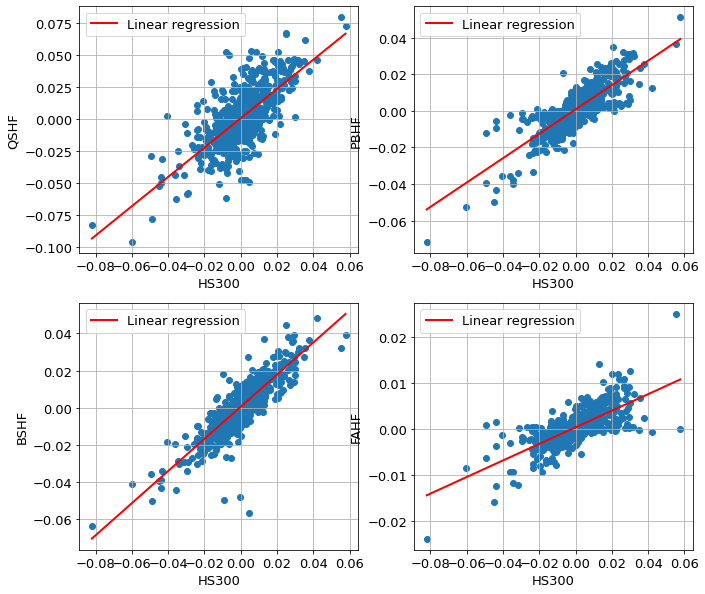

In [11]:
X_list=np.linspace(np.min(R_HS300),np.max(R_HS300),200)

import matplotlib.pyplot as plt

plt.figure(figsize=(11,10))
for i in range(len(R_mean)):
    plt.subplot(2,2,i+1)
    plt.scatter(R_HS300,R_fund.iloc[:,i])
    plt.plot(X_list,cons[i]+betas[i]*X_list,'r-',label='Linear regression',lw=2.0)
    plt.xlabel('HS300',fontsize=13)
    plt.ylabel(R_fund.columns[i],fontsize=13)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.legend(fontsize=13)
    plt.grid()
plt.show()

In [12]:
TR_3years=TR(Rp=R_mean,Rf=R_f,beta=betas)
print('3 years average Treynor ratio\n',round(TR_3years,4))

3 years average Treynor ratio
 QSHF    0.1915
PBHF    0.3307
BSHF    0.2093
FAHF    0.5974
dtype: float64


# 8.6.4.Calmar ratio

$$CR=\frac{E(R_P)}{MDD}\tag{8-63}$$\
where,\
MDD:Maximum Drawdown

## Maximum Drawdown
$$DD_{ij}=\frac{P_i-P_j}{P_i}\tag{8-64}$$\
$$MDD=max(DD_{ij})=max\left(\frac{P_i-P_j}{P_i}\right)\tag{8-65}$$

$$\mathbf{DD}=\begin{bmatrix}DD_{12} & DD_{13}& \cdots&DD_{1N-1}&DD_{1N}\\
0 & DD_{23}&\cdots&DD_{2N-1}&DD_{2N}\\
\vdots&\vdots&\ddots&\vdots&\vdots\\
0&0&\cdots&0&DD_{N-1N} \end{bmatrix}\tag{8-66}$$

In [13]:
def CR(Rp,MDD):
    '''Define a function to calculate Calmar ratio
    Rp:annualized return rate of portfolio
    MDD:Maximum drawdown of portfolio'''
    calmar_ratio=Rp/MDD
    return calmar_ratio

In [16]:
import numpy as np

def MDD(data):
    '''Define a function to calculate maximum drawdown
    data:NPV of portfolio, input as series or dataframe'''
    N=len(data)
    DD=np.zeros((N-1,N-1))
    for i in range(N-1):
        Pi=data.iloc[i]
        for j in range(i+1,N):
            Pj=data.iloc[j]
            DD[i,j-1]=(Pi-Pj)/Pi
    Max_DD=np.max(DD)
    return Max_DD

In [17]:
fund_zhonghai=fund['QSHF']
fund_nanfang=fund['PBHF']
fund_jiaoyin=fund['BSHF']
fund_tianhong=fund['FAHF']

MDD_zhonghai=MDD(data=fund_zhonghai)
MDD_nanfang=MDD(data=fund_nanfang)
MDD_jiaoyin=MDD(data=fund_jiaoyin)
MDD_tianhong=MDD(data=fund_tianhong)

print('Max drawdown of Zhonghai between 2018 to 2020 is ',round(MDD_zhonghai,4))
print('Max drawdown of Nanfang between 2018 to 2020 is ',round(MDD_nanfang,4))
print('Max drawdown of Jiaoyin between 2018 to 2020 is ',round(MDD_jiaoyin,4))
print('Max drawdown of Tianhong between 2018 to 2020 is ',round(MDD_tianhong,4))

Max drawdown of Zhonghai between 2018 to 2020 is  0.3375
Max drawdown of Nanfang between 2018 to 2020 is  0.1473
Max drawdown of Jiaoyin between 2018 to 2020 is  0.2623
Max drawdown of Tianhong between 2018 to 2020 is  0.054


In [18]:
CR_zhonghai=CR(Rp=R_mean['QSHF'],MDD=MDD_zhonghai)
CR_nanfang=CR(Rp=R_mean['PBHF'],MDD=MDD_nanfang)
CR_jiaoyin=CR(Rp=R_mean['BSHF'],MDD=MDD_jiaoyin)
CR_tianhong=CR(Rp=R_mean['FAHF'],MDD=MDD_tianhong)

print('Carmar ratio of QSHF is ',round(CR_zhonghai,4))
print('Carmar ratio of PBHF is ',round(CR_nanfang,4))
print('Carmar ratio of BSHF is ',round(CR_jiaoyin,4))
print('Carmar ratio of FAHF is ',round(CR_tianhong,4))

Carmar ratio of QSHF is  0.6926
Carmar ratio of PBHF is  1.5963
Carmar ratio of BSHF is  0.7485
Carmar ratio of FAHF is  2.2728


# 8.6.5.Information Ratio

Tracking Difference is defined as below:\
$$TD=E(R_P)-E(R_B)\tag{8-67}$$\
where,\
$E(R_P)$:expected return of portfolio\
$E(R_B)$:expected return of benchmark portfolio

Tracking Error is defined as below:\
$$TE=\sqrt{\frac{1}{N-1}\sum_{t=1}^N(TD_t-\overline{TD})^2}\tag{8-68}$$\
where,\
$\overline{TD}$:mean of TD\
$TD_t$:TD of time t, $TD_t=R_{Pt}-R_{Bt}$

$$IR=\frac{TD}{TE}=\frac{E(R_P)-E(R_B)}{TE}\tag{8-69}$$

In [19]:
def IR(Rp,Rb,TE):
    '''Define a function to calculate Information Ratio
    Rp:Annualized return of portfolio
    Rb:Annualized return of benchmark portfolio
    TE:Tracking error'''
    information_ratio=(Rp-Rb)/TE
    return information_ratio

In [21]:
TE_fund=np.zeros_like(R_mean)

for i in range(len(R_mean)):
    TD=np.array(R_fund.iloc[:,i])-np.array(R_HS300.iloc[:,0])
    TE_fund[i]=TD.std()*np.sqrt(252)
    print(R_fund.columns[i],'Tracking error',round(TE_fund[i],4))

QSHF Tracking error 0.2398
PBHF Tracking error 0.123
BSHF Tracking error 0.1115
FAHF Tracking error 0.1799


In [22]:
R_mean_HS300=R_HS300.mean()*252
R_mean_HS300=float(R_mean_HS300)

IR_3years=IR(Rp=R_mean,Rb=R_mean_HS300,TE=TE_fund)
print('3 years average Information ratio\n',round(IR_3years,4))

3 years average Information ratio
 QSHF    0.6244
PBHF    1.2281
BSHF    1.0076
FAHF    0.2155
dtype: float64
